# **Problem Statement**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We are working as a data analyst in a company called Fast Cars. Fast Cars is a cab agglomerator like Uber and Ola i.e. it connects passengers to cabs in cities for travel through an app.

They are going to launch their product in New York City. But before they want to understand the new york taxi market.

As a data analyst you are provided with a Yellow Taxi dataset which contains information about taxis that people took in New York city from streets. 

You are asked to analyse this data to provide insights about the taxi market of new york.

Do a short and preliminary analysis on the data.

You can find the data and the relevant information about Yellow Taxi dataset here - https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

# **Data identification and collection**

As this is a short and preliminary analysis, so we will be focussing on only 1 month of data for analysis.

viz. 2018 january.

The data is collected from the above website mentioned

# **Data Cleaning and Manipulation**

The first stage in any EDA problem solving strategy is Data cleaning and Manipulation stage.

**Data Cleaning and Manipulation Steps**

> Data Understanding

- Reading Dataset documentation
- Importing data - understanding each column data
- Data Summarisation like Check data type of columns, number of rows etc.

> Data Cleaning

- Dropping irrelevant columns
- Renaming the columns
- Dropping the duplicate rows 
- Dropping or handling missing values
- Dropping invalid data rows (Also check if column have correct data type)
- Detecting and handling outliers (this can be handled in data analysis part as well)


> Data Manipulation

- Column transformation
- Joining datasets
- other manipulation like pivoting or transposing (this is also applied in  data analysis part)

## Data Understanding

### Reading data documentation

In the website - https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

there is data about yellow taxis in csv format categorised by each year and month.

There is data dictionary pdf as well mentioned in the website called `Yellow Trips Data Dictionary`

By looking at data_description file we find that following columns would be useful for our analysis:(you can find the data description file here - https://drive.google.com/file/d/1B6JUAqGNmaMfyc6TQqxRWrvOVI1DtgQf/view?usp=sharing)<br>
* tpep_pickup_datetime - The date and time when the meter was engaged. 
* tpep_dropoff_datetime - The date and time when the meter was disengaged.
* Passenger_count - The number of passengers in the vehicle. 
* Trip_distance - The elapsed trip distance in miles reported by the taximeter.
* PULocationID - TLC Taxi Zone in which the taximeter was engaged
* DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
* Payment_type - A numeric code signifying how the passenger paid for the trip. 
* Fare_amount - The time-and-distance fare calculated by the meter.
* Extra - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
* MTA_tax - \\$ 0.50 MTA tax that is automatically triggered based on the metered rate in use.
* Improvement_surcharge - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
* congestion_surcharge - fees on congestion
* Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.
* Tolls_amount - Total amount of all tolls paid in trip.
* Total_amount -  The total amount charged to passengers. Does not include cash tips.

And we will drop the following columns:<br>
* VendorID
* RateCodeID 
* Store_and_fwd_flag

For more details about each column value or the data available please look at the file attached to the link of `Trip Record User Guide`

We also have `taxi+_zone_lookup.csv` file where the zone ID mentioned in the columns `PULocationID` and `DOLocationID` are mapped to their respective locations.

### Importing the data

In [2]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# yellow taxi data
file_loc = '/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_tripdata_feb2020.csv'

# read file
trip_data = pd.read_csv(file_loc)
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,1.0,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1.0,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,1.0,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1.0,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,2.0,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1.0,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,2.0,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


In [4]:
# taxi zone lookup file
file_loc_2 = '/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/taxi+_zone_lookup.csv'

#zone look up file 
taxi_zone_data = pd.read_csv(file_loc_2)
taxi_zone_data.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Data Summarisation

In [ ]:
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,1.0,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1.0,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,1.0,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1.0,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,2.0,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1.0,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,2.0,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


In [ ]:
trip_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6299349,NaN,2020-02-28 14:28:00,2020-02-28 14:54:00,NaN,8.60,NaN,NaN,259,247,NaN,30.81,2.75,0.5,0.0,0.0,0.3,34.36,0.0
6299350,NaN,2020-02-28 14:03:00,2020-02-28 14:11:00,NaN,3.01,NaN,NaN,212,31,NaN,22.59,2.75,0.5,0.0,0.0,0.3,26.14,0.0
6299351,NaN,2020-02-28 14:55:00,2020-02-28 15:02:00,NaN,0.71,NaN,NaN,42,42,NaN,13.43,2.75,0.5,0.0,0.0,0.3,16.98,0.0
6299352,NaN,2020-02-28 14:29:00,2020-02-28 14:51:00,NaN,12.40,NaN,NaN,38,53,NaN,30.54,2.75,0.5,0.0,0.0,0.3,34.09,0.0
6299353,NaN,2020-02-28 14:06:00,2020-02-28 14:38:00,NaN,6.96,NaN,NaN,226,135,NaN,30.30,2.75,0.5,0.0,0.0,0.3,33.85,0.0


In [5]:
print(trip_data.shape)

(6299354, 18)


In [6]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299354 entries, 0 to 6299353
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 865.1+ MB


## Data Cleaning and Manipulation Steps (Reading Assignment)

We have done all the data cleaning and manipulation steps below though we have not followed the exact cleaning steps methodically as mentioned at the start.

These are the cleaning that we have done
* Dropped 3 columns `'VendorID','RatecodeID','store_and_fwd_flag'`
* converted pickup and dropoff column data type to datetime
* Extracted trip day from the pickup datetime column
* Extracted pickup hour and dropoff hour also from the above datetime columns
* calculated duration value from it
* checked for missing values
* converted payment type value from integer to string (based on mapping given in data dictionary file)
* combined the three tax values (mta_tax , extra, improvement_surcharge) into one single value called total_taxes.

In [7]:
# remove following columns - 'VendorID','RatecodeID','store_and_fwd_flag'
trip_data.drop(['VendorID','RatecodeID','store_and_fwd_flag'],axis=1,inplace=True)
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,1.0,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,1.0,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,1.0,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


We will now deal with time related columns, we have two time related columns
* tpep_pickup_datetime 
* tpep_dropoff_datetime

We will first convert these column to datatime data type of pandas.

we will create three different features from these  
* hour - pickup hour and dropoff hour
* day name - this is basically the day of the week when trip took place - we will only take day name from pickup date.
( as day name for drop date is supposed to be same as pickup date)
* duration of trip

In [8]:
# convert 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299354 entries, 0 to 6299353
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
dtypes: datetime64[ns](2), float64(11), int64(2)
memory usage: 720.9 MB
None


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,1.0,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,1.0,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,1.0,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


In [9]:
# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299354 entries, 0 to 6299353
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  duration               float64       
 16  trip_pickup_hour       int64         
 17  trip_dropoff_hour      int64         
 18  trip_day              

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0,12.950000,0,0,Saturday
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,1.0,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5,32.816667,0,1,Saturday
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,1.0,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5,11.733333,0,0,Saturday
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,1.0,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5,24.066667,0,0,Saturday
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0,9.766667,0,1,Saturday


Let's also see the number of missing values for each column

In [12]:
# print missing values for each column - use .isnull().sum
trip_data.isnull().mean(axis=0)*100

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.775222
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.775222
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
duration                 0.000000
trip_pickup_hour         0.000000
trip_dropoff_hour        0.000000
trip_day                 0.000000
dtype: float64

From the above table we can observe that we have very few (0.07%) missing values so we can drop that rows.

In [13]:
trip_data.dropna(inplace=True)

In [14]:
trip_data.isnull().sum(axis=0).reset_index()

,index,0
0,tpep_pickup_datetime,0
1,tpep_dropoff_datetime,0
2,passenger_count,0
3,trip_distance,0
4,PULocationID,0
5,DOLocationID,0
6,payment_type,0
7,fare_amount,0
8,extra,0
9,mta_tax,0


In [15]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250520 entries, 0 to 6250519
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  duration               float64       
 16  trip_pickup_hour       int64         
 17  trip_dropoff_hour      int64         
 18  trip_day              

For payment_type we have the following mapping for categories:<br>
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [16]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1.0    4705726
2.0    1494465
3.0      32080
4.0      18249
Name: payment_type, dtype: int64

Now we will replace these number in payment category with actual category names.

In [17]:
# function for mapping numerical payment_type to actual payment
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data['payment_type'] = trip_data.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,Credit_card,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0,12.950000,0,0,Saturday
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,Credit_card,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5,32.816667,0,1,Saturday
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,Credit_card,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5,11.733333,0,0,Saturday
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,Credit_card,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5,24.066667,0,0,Saturday
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,Cash,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0,9.766667,0,1,Saturday


In [18]:
# print data info to show that payment_type data type has changed
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250520 entries, 0 to 6250519
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           object        
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  duration               float64       
 16  trip_pickup_hour       int64         
 17  trip_dropoff_hour      int64         
 18  trip_day              

Now our Total_amount is basically<br>
Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'.

We are combining the extra, mta_tax and improvement_surcharge under one category called total_taxes as these are determined by local laws and taxes and is not dependent upon distance travelled or time taken for trip.

Here total taxes would be the sum of three columns 'extra','mta_tax', 'improvement_surcharge'. So we will make a new column for total_taxes.

We will also drop these three columns 'extra','mta_tax','improvement_surcharge'.


In [19]:
# create 'total_taxes' column from summing 'extra','mta_tax', 'improvement_surcharge'
trip_data['total_taxes'] = trip_data['extra']+trip_data['mta_tax']+trip_data['improvement_surcharge']
# drop 'extra','mta_tax','improvement_surcharge' columns
trip_data.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3


In [ ]:
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3


In [20]:
trip_data.to_csv('/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_data_Feb2020_cleaned.csv',index=False)

We will be reading back this file in data analysis and visualisation step.

# Data Analysis and Visualisation

Let's load back our cleaned dataset here.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
trip_data = pd.read_csv('/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_data_Feb2020_cleaned.csv')
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3


Now this problem statement is very open ended as we are not given a clear idea exactly what kinds of analysis we should do.

We are just told about the data which we have to explore and analyse.

In such cases we could follow the below series of steps to standardise our exploration of the dataset.

- Start by writing the assumption and question that you want to solve (This is just a preliminary assumption and question writing and you need to be too much detailed here). The purpose of this is to identify the most important analysis that you should and not miss it out.
- Univariate analysis
    - Analyse each feature separately
    - Depending upon data type execute the analysis
     - numerical and visual
    - Data validation - check if the data is correct or not
    - You should try to identify trends and test your assumptions here 
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Bivariate analysis 
    - analyse combination of features (if possible analyse all combinations but definitely go for the feature combinations that makes most sense to analyse)
    - correlation and pair plotting
    - You should try to identify trends and test your assumptions here
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Custom Analysis - You would have some insights by this point of the analysis. Then you deep dive into these insights.
- Combine your results and present it

Except for custom analysis part we will be executing all the parts below.

## ASSUMPTIONS/ANALYSIS THAT MIGHT BE USEFUL FOR OUR COMPANY<br>

**IMPORTANT CHARACTERISTICS OF A TRIP**
* fare_amount, trip_distance, duration and passenger count distribution can tell us about the important characteristics about the trip.


**PRICING EXPLORATION**
* payment_type can tell us which kind of payment mode the customer usually favours.


* Another issue that taxi companies face is pricing the trip appropriately. So for exploring the pricing of trip, we can also look into the relationship between pricing related variables and hour/day of trip and pricing related variables and location.

**TIME/LOCATION EXPLORATION** 
* To maximize the earnings we should be focussing on trips which are on busy locations and busy times. 


**DURATION OF TRIP EXPLORATION**
* A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip. So, We should look into relationship between duration and location, duration and hour of trip.




## **Univariate Analysis**

The first step in doing any kind of EDA is identifying the distribution of important variables in EDA. This helps us in finding important insights about the data.<br>
We should look into the distribution of these specific columns:<br>
Price Based Columns
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* payment_type
* total_amount

Time Based Columns
* duration
* trip_pickup_hour
* trip_dropoff_hour
* trip_day

Distance/Location Based Columns
* trip_distance
* PULocationID
* DOLocationID

Other columns
* passenger_count

Before we explore the distribution of each column we must identify column category because distribution analysis depends upon variable category:<br>
* Continuous - column which are measurable and uncountable in nature - we use histograms and box plot
* Categorical - column which have categories as it data - we use bar charts

Following columns are continuous in nature:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount
* duration
* trip_distance
* tolls_amount

Following columns are categorical in nature:<br>
* payment_type
* trip_pickup_hour - it has 24 categories
* trip_dropoff_hour - it has 24 categories
* trip_day - it has 7 categories
* PULocationID
* DOLocationID
* Passenger_count

We will look into the distrbution of passenger_count at the last.

**CONTINUOUS VARIABLE DISTRIBUTION**

In [23]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_taxes','total_amount','duration','trip_distance','tolls_amount']

In [24]:
trip_data[continuous_columns].head()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
0,11.0,2.45,1.3,14.75,12.950000,2.60,0.0
1,21.5,6.30,3.8,31.60,32.816667,4.80,0.0
2,11.0,1.00,3.8,15.80,11.733333,3.20,0.0
3,18.0,3.00,1.3,24.80,24.066667,4.38,0.0
4,9.5,0.00,1.3,10.80,9.766667,2.28,0.0


In [25]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,6.250520e+06,6.250520e+06,6.250520e+06,6.250520e+06,6.250520e+06,6.250520e+06,6.250520e+06
mean,1.245649e+01,2.237490e+00,1.887133e+00,1.844634e+01,1.602991e+01,2.789205e+00,3.170085e-01
std,1.175895e+01,2.667472e+00,1.261441e+00,1.435990e+01,6.168323e+01,3.640199e+00,1.658400e+00
min,-7.500000e+02,-9.300000e+01,-5.300000e+00,-7.503000e+02,-9.990667e+03,0.000000e+00,-3.823000e+01
25%,6.500000e+00,0.000000e+00,8.000000e-01,1.127000e+01,6.516667e+00,9.500000e-01,0.000000e+00
50%,9.000000e+00,1.960000e+00,1.300000e+00,1.430000e+01,1.075000e+01,1.600000e+00,0.000000e+00
75%,1.400000e+01,2.950000e+00,3.300000e+00,1.980000e+01,1.716667e+01,2.860000e+00,0.000000e+00
max,6.052000e+03,5.490200e+02,9.086000e+01,6.061420e+03,3.147617e+03,3.699400e+02,9.255000e+02


Since we are trying to understand the distribution of continuous numerical variables, we will be using 
* histograms
* box plots

Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


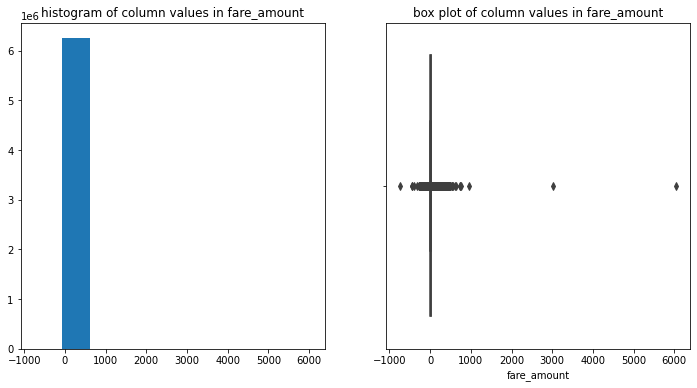

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


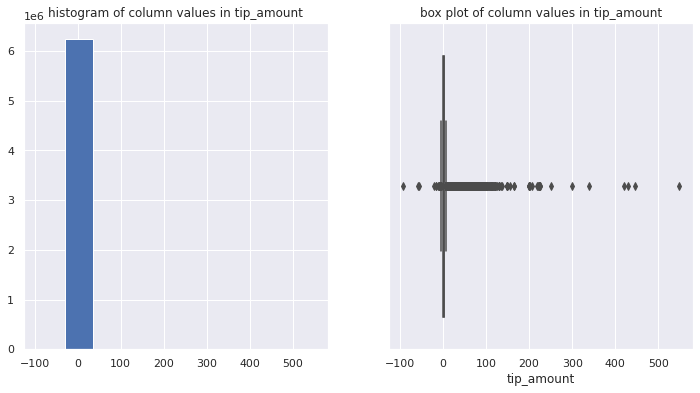

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


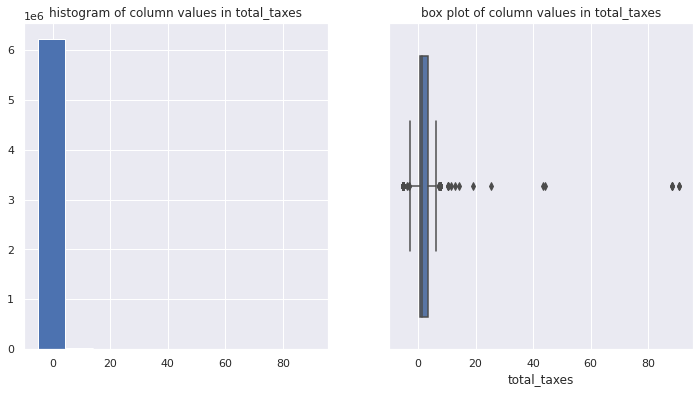

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


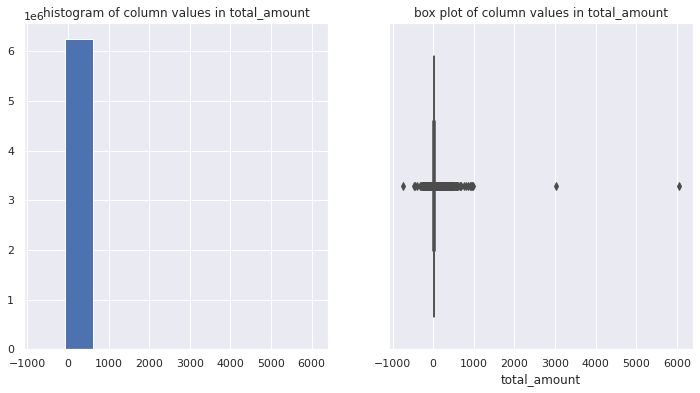

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


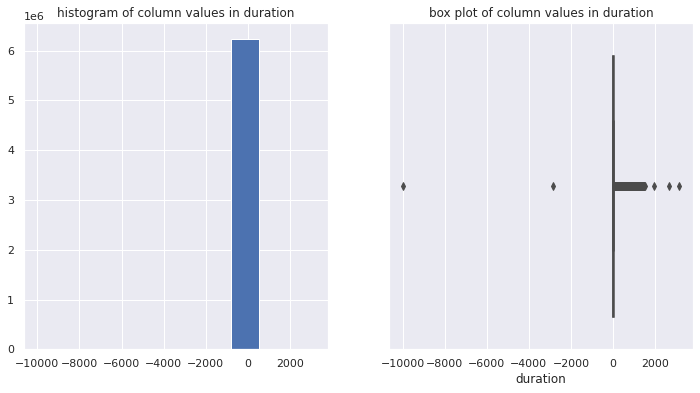

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


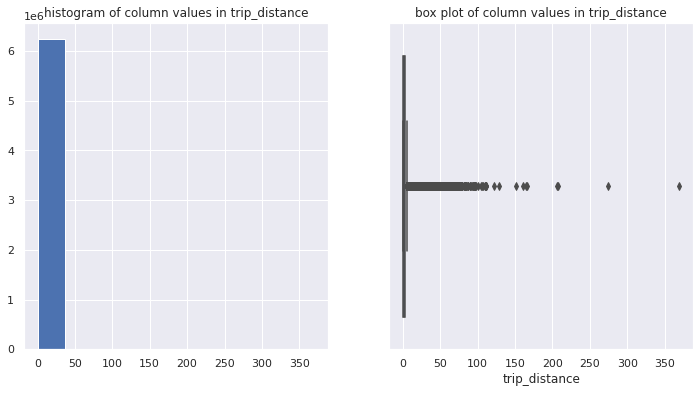

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


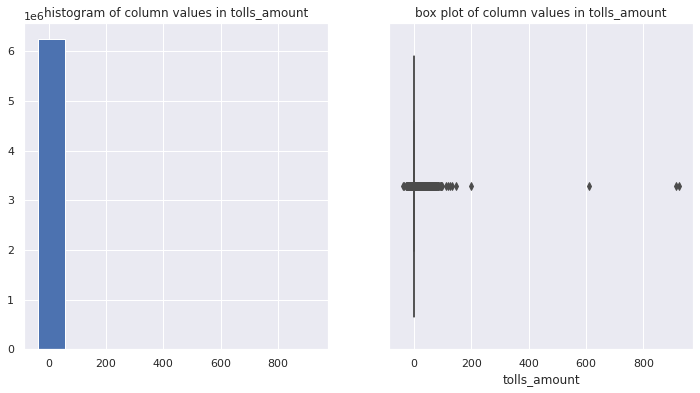

In [26]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense<br>
fare_amount<br>
tip_amount<br>
total_taxes<br>
tolls_amount<br>
total_amount<br>
duration<br>

Let's just observe how the negative values in each of these columns look like

In [27]:
# using .loc to show negative values in fare_amount  # 8 mil rows
trip_data.loc[trip_data['fare_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5.0,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,-2.5,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1.0,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,0.0,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1.0,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,-2.5,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1.0,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,-2.5,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1.0,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,-2.5,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249589,2020-02-29 23:42:01,2020-02-29 23:48:28,1.0,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,-2.5,6.450000,23,23,Saturday,-1.3
6250075,2020-02-29 23:58:03,2020-03-01 00:10:03,1.0,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,-2.5,12.000000,23,0,Saturday,-1.3
6250306,2020-02-29 23:57:34,2020-02-29 23:59:33,1.0,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,-2.5,1.983333,23,23,Saturday,-1.3
6250340,2020-02-29 23:32:22,2020-02-29 23:47:16,1.0,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,-2.5,14.900000,23,23,Saturday,-1.3


In [28]:
# using .loc to show negative values in tip_amount
trip_data.loc[trip_data['tip_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
90145,2020-02-01 13:53:14,2020-02-01 13:53:31,1.0,0.00,233,233,No_charge,-2.5,-1.16,0.0,-8.91,-2.5,0.283333,13,13,Saturday,-0.8
265262,2020-02-02 10:53:13,2020-02-02 10:53:28,1.0,0.00,193,193,No_charge,-2.5,-0.66,0.0,-3.96,0.0,0.250000,10,10,Sunday,-0.8
271885,2020-02-02 11:23:46,2020-02-02 11:28:10,1.0,0.86,246,90,No_charge,-5.5,-1.00,0.0,-9.80,-2.5,4.400000,11,11,Sunday,-0.8
272648,2020-02-02 11:36:17,2020-02-02 11:38:03,1.0,0.00,193,193,No_charge,-3.0,-0.76,0.0,-4.56,0.0,1.766667,11,11,Sunday,-0.8
336218,2020-02-02 17:49:48,2020-02-02 17:50:28,1.0,0.00,193,193,No_charge,-2.5,-0.66,0.0,-3.96,0.0,0.666667,17,17,Sunday,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005279,2020-02-28 22:24:06,2020-02-28 22:24:14,1.0,0.00,7,7,No_charge,-2.5,-1.14,0.0,-4.94,0.0,0.133333,22,22,Friday,-1.3
6034008,2020-02-29 01:39:31,2020-02-29 01:40:36,4.0,0.20,236,237,Dispute,-3.0,-1.50,0.0,-8.30,-2.5,1.083333,1,1,Saturday,-1.3
6043967,2020-02-29 02:07:11,2020-02-29 02:07:14,1.0,0.00,13,264,Dispute,-31.0,-7.95,0.0,-39.75,0.0,0.050000,2,2,Saturday,-0.8
6046852,2020-02-29 02:06:26,2020-02-29 02:06:35,4.0,0.00,211,211,Dispute,-30.0,-6.56,0.0,-39.36,-2.5,0.150000,2,2,Saturday,-0.3


In [29]:
# using .loc to show negative values in tolls_amount
trip_data.loc[trip_data['tolls_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
1981,2020-02-01 00:54:26,2020-02-01 01:07:28,1.0,5.43,74,138,Dispute,-17.5,0.0,-6.12,-24.92,0.0,13.033333,0,1,Saturday,-1.3
24629,2020-02-01 03:27:35,2020-02-01 03:28:43,1.0,0.00,265,265,Dispute,-45.0,0.0,-11.75,-57.05,0.0,1.133333,3,3,Saturday,-0.3
26688,2020-02-01 03:38:15,2020-02-01 03:55:41,1.0,7.57,107,82,Dispute,-23.5,0.0,-6.12,-33.42,-2.5,17.433333,3,3,Saturday,-1.3
30057,2020-02-01 04:14:57,2020-02-01 04:33:59,1.0,10.08,237,138,Cash,-29.0,0.0,-6.12,-38.92,-2.5,19.033333,4,4,Saturday,-1.3
33505,2020-02-01 06:24:00,2020-02-01 06:50:57,1.0,20.62,132,119,Cash,-54.5,0.0,-6.12,-61.42,0.0,26.950000,6,6,Saturday,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175387,2020-02-29 18:49:16,2020-02-29 19:17:31,2.0,9.86,186,138,Dispute,-32.0,0.0,-6.12,-41.42,-2.5,28.250000,18,19,Saturday,-0.8
6176151,2020-02-29 18:32:16,2020-02-29 18:49:31,2.0,6.16,13,133,Cash,-20.0,0.0,-6.12,-29.42,-2.5,17.250000,18,18,Saturday,-0.8
6187966,2020-02-29 19:46:34,2020-02-29 19:46:43,2.0,0.00,230,230,Dispute,-52.0,1.5,-6.12,-59.92,-2.5,0.150000,19,19,Saturday,-0.8
6226792,2020-02-29 22:33:48,2020-02-29 22:53:11,1.0,6.13,161,80,Dispute,-20.5,0.0,-6.12,-30.42,-2.5,19.383333,22,22,Saturday,-1.3


In [30]:
# using .loc to show negative values in total_taxes
trip_data.loc[trip_data['total_taxes']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5.0,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,-2.5,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1.0,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,0.0,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1.0,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,-2.5,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1.0,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,-2.5,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1.0,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,-2.5,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249589,2020-02-29 23:42:01,2020-02-29 23:48:28,1.0,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,-2.5,6.450000,23,23,Saturday,-1.3
6250075,2020-02-29 23:58:03,2020-03-01 00:10:03,1.0,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,-2.5,12.000000,23,0,Saturday,-1.3
6250306,2020-02-29 23:57:34,2020-02-29 23:59:33,1.0,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,-2.5,1.983333,23,23,Saturday,-1.3
6250340,2020-02-29 23:32:22,2020-02-29 23:47:16,1.0,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,-2.5,14.900000,23,23,Saturday,-1.3


In [31]:
# using .loc to show negative values in total_amount
trip_data.loc[trip_data['total_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5.0,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,-2.5,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1.0,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,0.0,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1.0,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,-2.5,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1.0,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,-2.5,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1.0,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,-2.5,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249589,2020-02-29 23:42:01,2020-02-29 23:48:28,1.0,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,-2.5,6.450000,23,23,Saturday,-1.3
6250075,2020-02-29 23:58:03,2020-03-01 00:10:03,1.0,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,-2.5,12.000000,23,0,Saturday,-1.3
6250306,2020-02-29 23:57:34,2020-02-29 23:59:33,1.0,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,-2.5,1.983333,23,23,Saturday,-1.3
6250340,2020-02-29 23:32:22,2020-02-29 23:47:16,1.0,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,-2.5,14.900000,23,23,Saturday,-1.3


Can i replace negative values of fare_amount with 0?

Ans. Not here. Because it will not give us a good measure of averages or other statistical measures. 

From the above table displays it is clear whenever fare_amount is negative, we have negative values in 'tip_amount','total_taxes' and 'total_amount'. You can check this by looking at the indexes of few of the rows.


Negative values for these cases does not make sense for doing our analysis. The reason for these negative values can be explored later on if we want to understand the data more better. For now we will remove these rows. 

Also, number of negative rows are 19982 which is 0.003% of total 6250520 observations. So even if we remove them it does not hamper the quantity of data that we have.

In [32]:
# data shape before filtering negative fare_amount rows
print(trip_data.shape)
# using .loc to filter only those rows where fare_amount is positive 
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
# print data shape
print(trip_data.shape)
# print data.head()
trip_data.head()

(6250520, 17)
(6230537, 17)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3


Let's check if removing rows with negative fare amount has also removed rows with negative tip_amount, total_taxes etc.

In [33]:
print(trip_data.loc[trip_data['tip_amount']<0].shape)
print(trip_data.loc[trip_data['total_taxes']<0].shape)
print(trip_data.loc[trip_data['tolls_amount']<0].shape)

(0, 17)
(0, 17)
(1, 17)


We will look into the negative values for duration

In [34]:
# using .loc to show negative values in duration
trip_data.loc[trip_data['duration']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
938272,2020-02-05 16:28:03,2020-02-03 16:47:05,1.0,1.2,236,262,Credit_card,8.0,3.65,0.00,15.95,2.5,-2860.966667,16,16,Wednesday,4.3
2092815,2020-02-10 19:50:35,2020-02-03 21:19:55,1.0,22.0,132,161,Credit_card,52.0,12.25,6.12,73.67,2.5,-9990.666667,19,21,Monday,3.3


Since there are only two rows with negative duration, we will remove them so as to do our analysis in a better way

In [35]:
# using .loc to filter only those rows where duration is positive 
trip_data = trip_data.loc[trip_data['duration']>=0]
print(trip_data.shape)

(6230535, 17)


Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


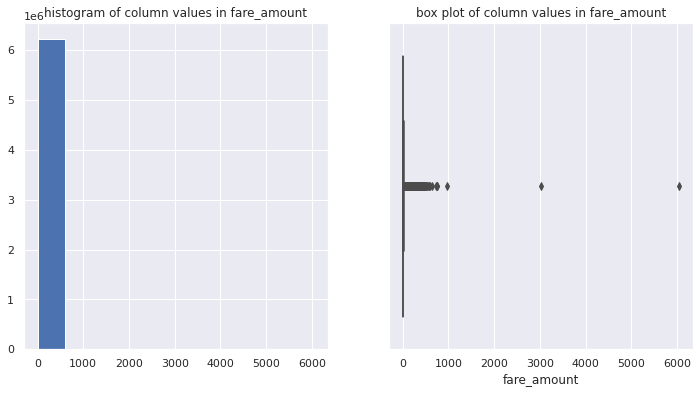

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


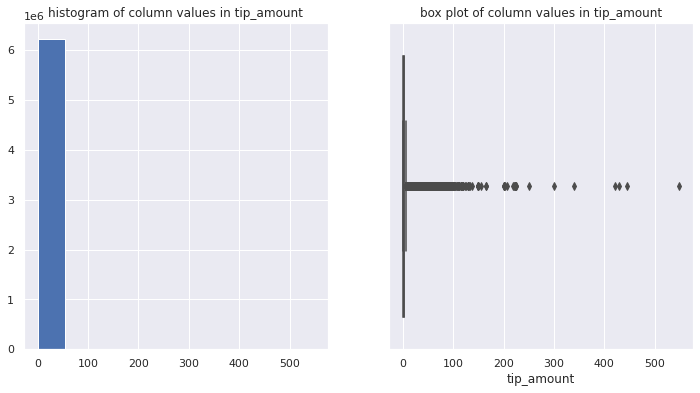

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


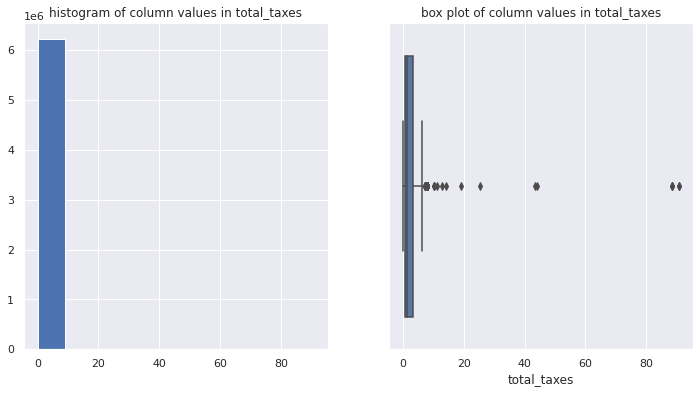

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


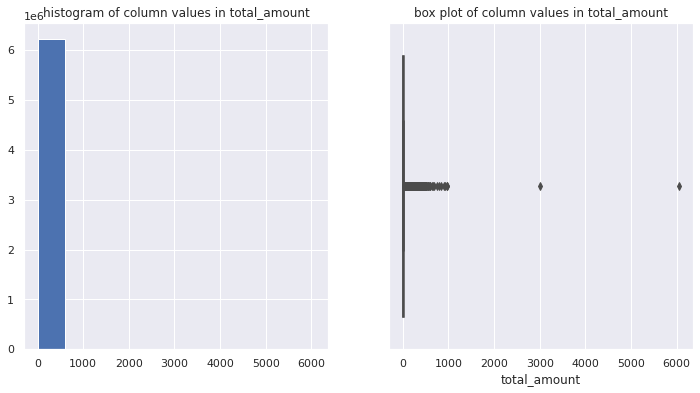

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


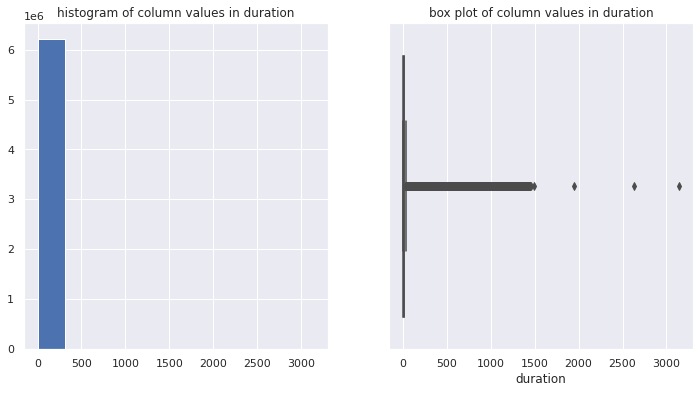

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


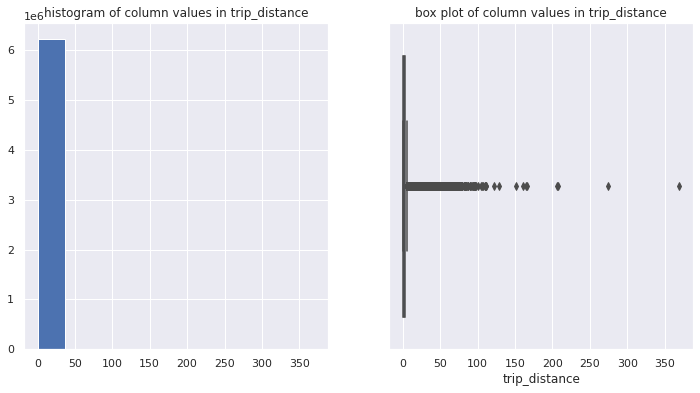

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


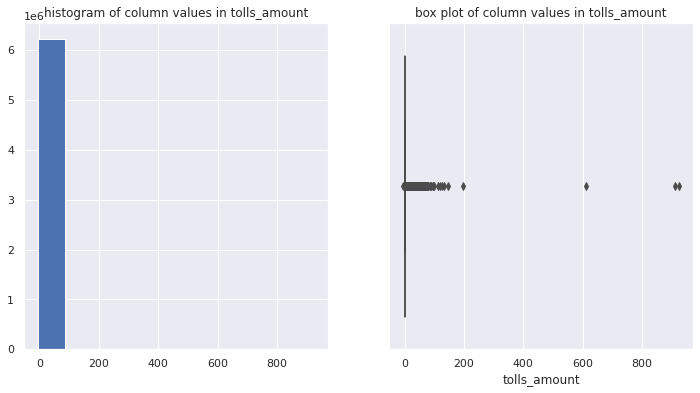

In [36]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [37]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,6.230535e+06,6.230535e+06,6.230535e+06,6.230535e+06,6.230535e+06,6.230535e+06,6.230535e+06
mean,1.253629e+01,2.244589e+00,1.896862e+00,1.855585e+01,1.605081e+01,2.792376e+00,3.185020e-01
std,1.164688e+01,2.667937e+00,1.251271e+00,1.421301e+01,6.156070e+01,3.640343e+00,1.659483e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.120000e+00
25%,6.500000e+00,0.000000e+00,8.000000e-01,1.130000e+01,6.533333e+00,9.600000e-01,0.000000e+00
50%,9.000000e+00,1.960000e+00,1.300000e+00,1.430000e+01,1.076667e+01,1.600000e+00,0.000000e+00
75%,1.400000e+01,2.950000e+00,3.300000e+00,1.980000e+01,1.718333e+01,2.870000e+00,0.000000e+00
max,6.052000e+03,5.490200e+02,9.086000e+01,6.061420e+03,3.147617e+03,3.699400e+02,9.255000e+02


we need to improve the look of histograms and box plots further as we are not able to clearly observe the distribution.

We will filter all the data for each feature with values less than 90% ile. Then plot that data as shown below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


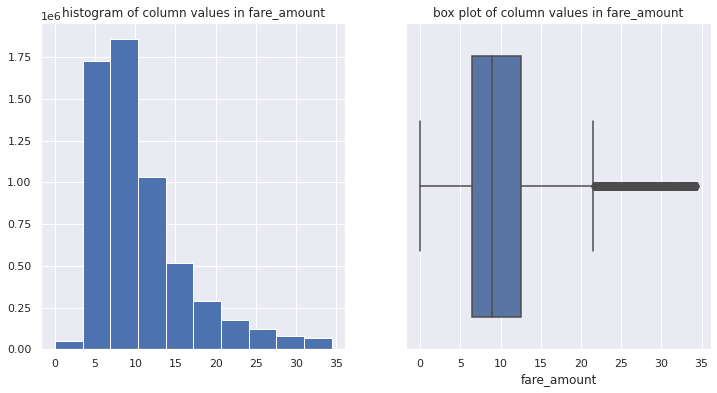

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


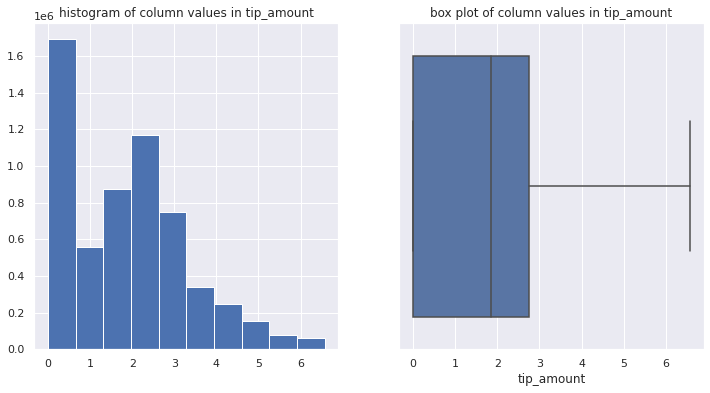

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


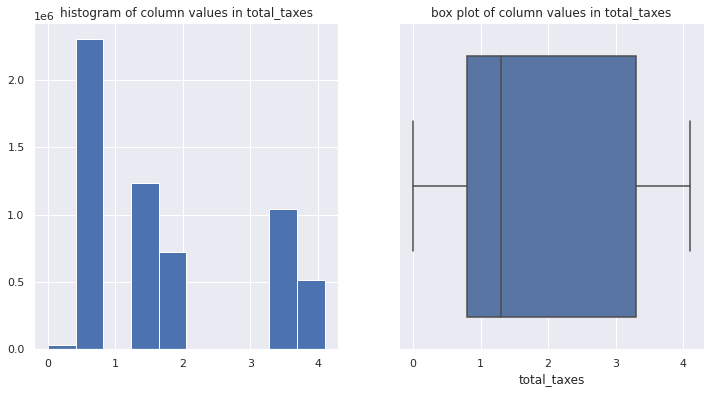

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


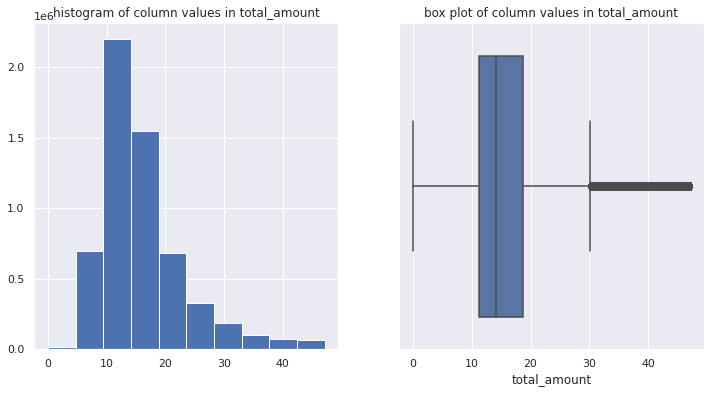

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


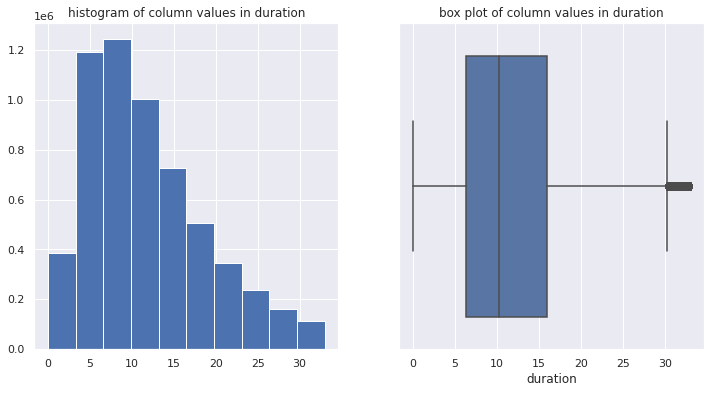

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


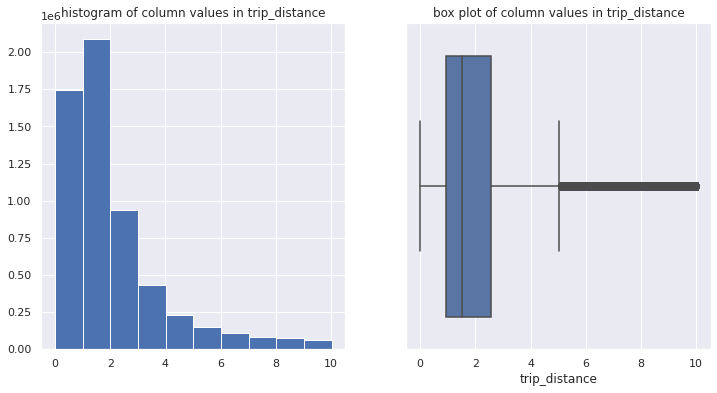

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


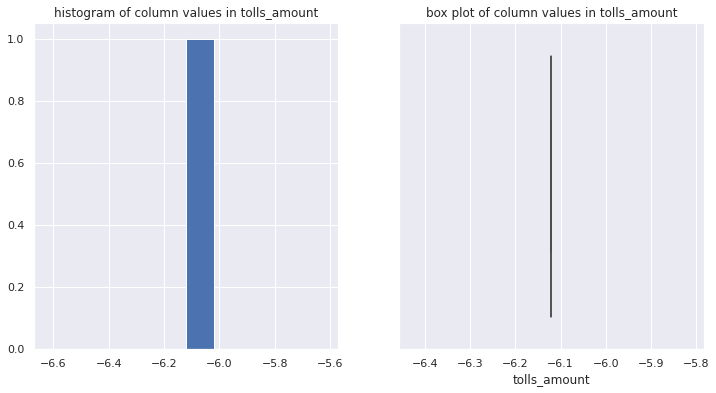

In [38]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column <br>
* fare_amount  - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 6052 dollars.


* tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 549 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.


* total_amount - most of the total_amount values is within 11 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 10.76 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3147.6 minutes.


* trip_distance - most of the trip_distance is within 1.6 miles value as is shown by the median. The outlier in this case is 369.9.

**CATEGORICAL VARIABLE DISTRIBUTION**<br>
Let's move on to analyse the distribution of categorical variables

for analysing distribution of categorical variables we use bar plots showing the count% of each category.

In [39]:
# list of categorical_variables
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [40]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    4705708
Cash           1490836
No_charge        25135
Dispute           8856
Name: payment_type, dtype: int64

In [41]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

,index,payment_type
0,Credit_card,4705708
1,Cash,1490836
2,No_charge,25135
3,Dispute,8856


In [42]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

,index,payment_type,count_percent
0,Credit_card,4705708,75.526548
1,Cash,1490836,23.927897
2,No_charge,25135,0.403416
3,Dispute,8856,0.142139


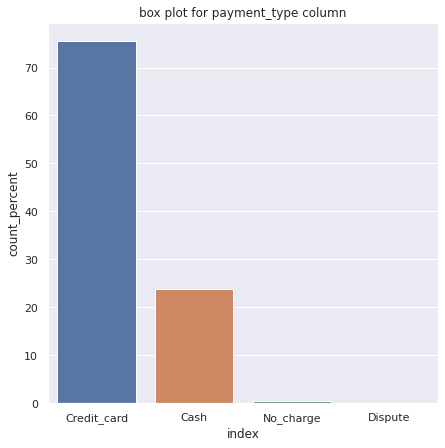

In [43]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is more than 75%.

Now we look into time based categorical variables.<br>
* 'trip_pickup_hour'
* 'trip_dropoff_hour'
* 'trip_day'


Number of categories in feature trip_pickup_hour is 24


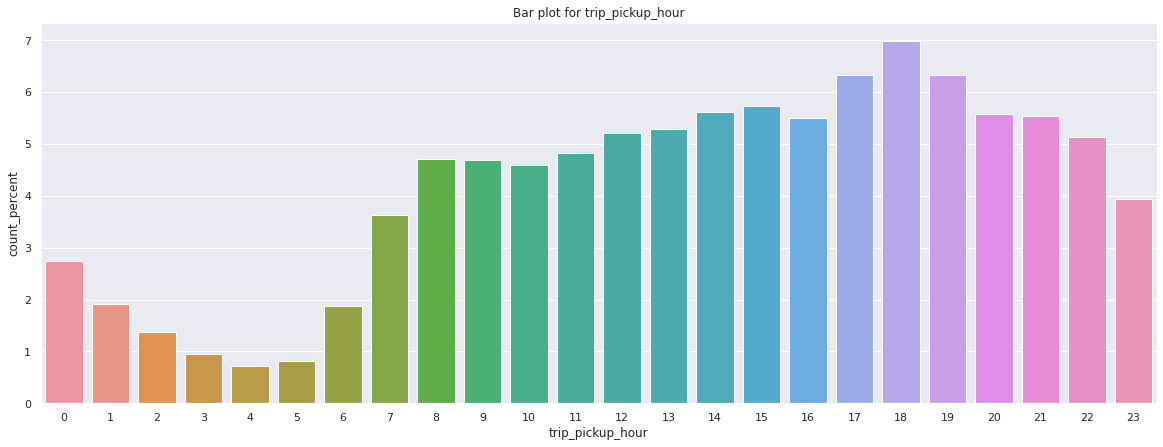

Number of categories in feature trip_dropoff_hour is 24


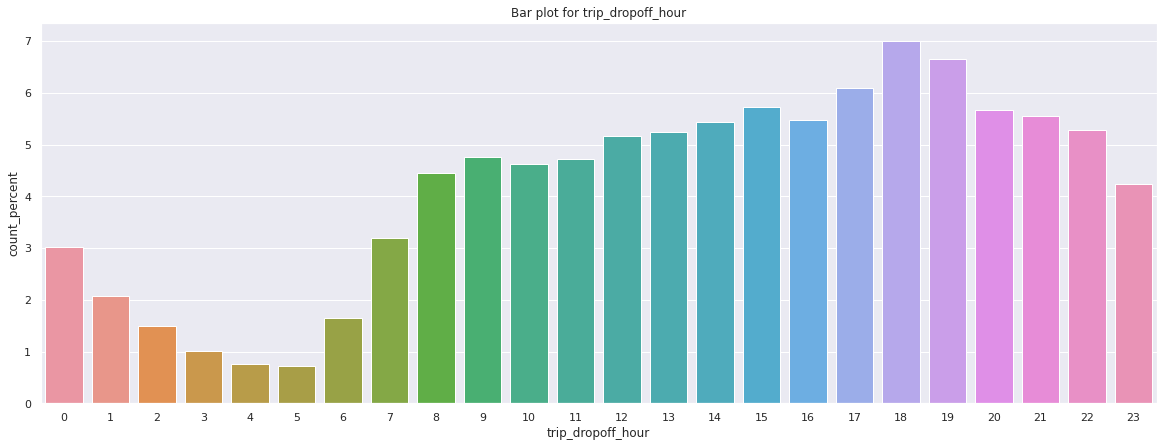

Number of categories in feature trip_day is 7


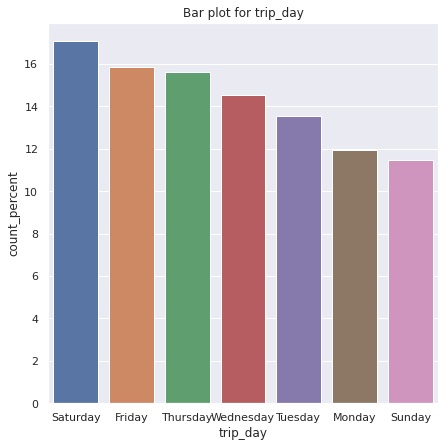

In [44]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things
* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6 to 18. The busiest time is 6PM.
    * there is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Weekdays except Monday have heavy taxi uses.
    * Among weekends Staturday has taxi highest taxi uses as compare to all days.


Moving on we will explore the distribution of location based features:<br>
* 'PULocationID'
* 'DOLocationID'

In [45]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(259,)
(261,)


So we have around 260 categories for location. To plot it on bar plots we need to increase the figure size.


Number of categories in feature PULocationID is 259


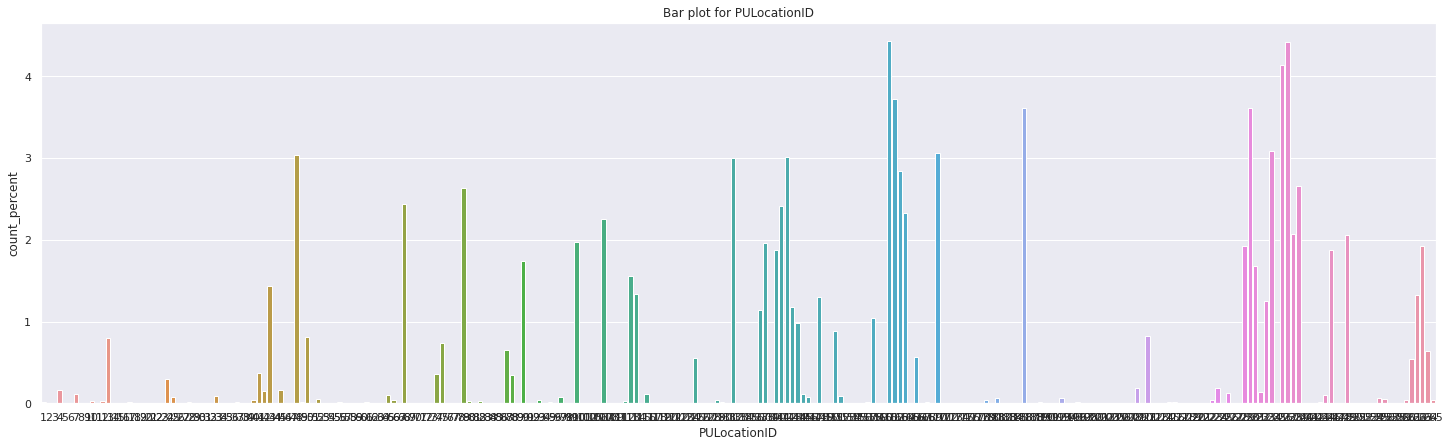

Number of categories in feature DOLocationID is 261


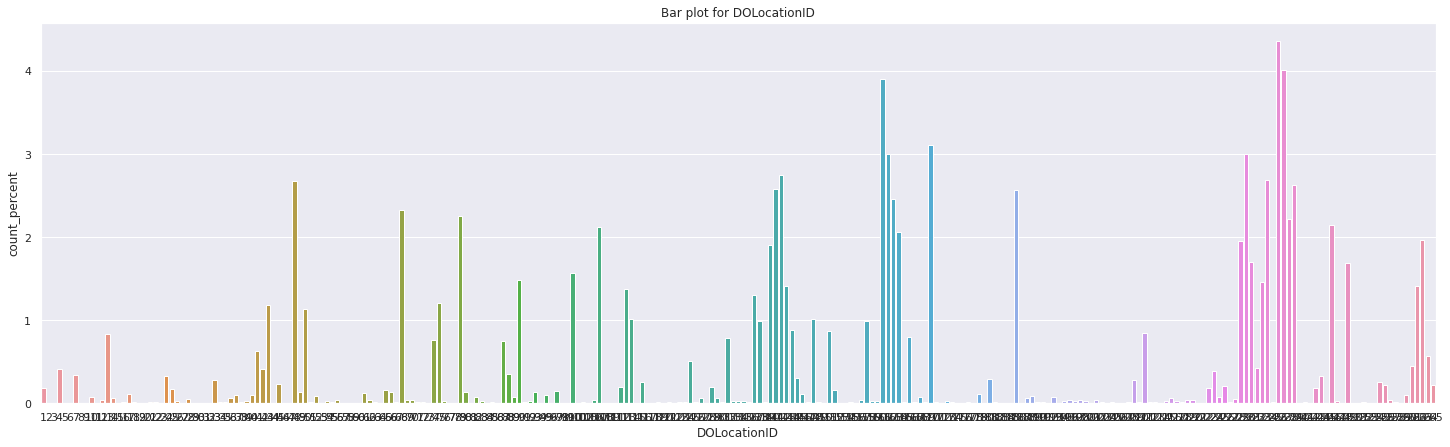

In [46]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 48


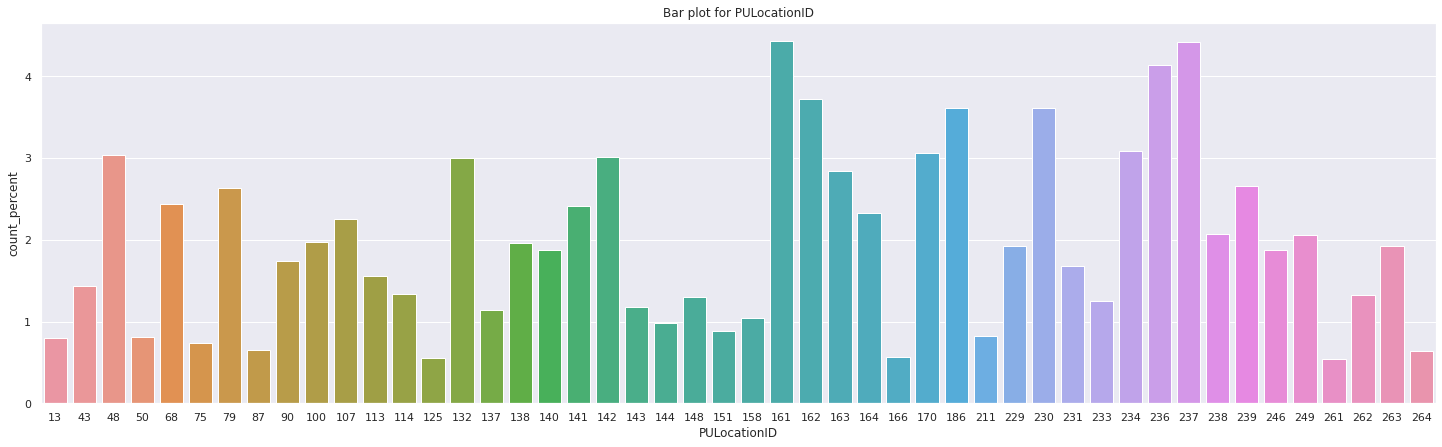

Number of categories in feature DOLocationID above 0.5 % count is 49


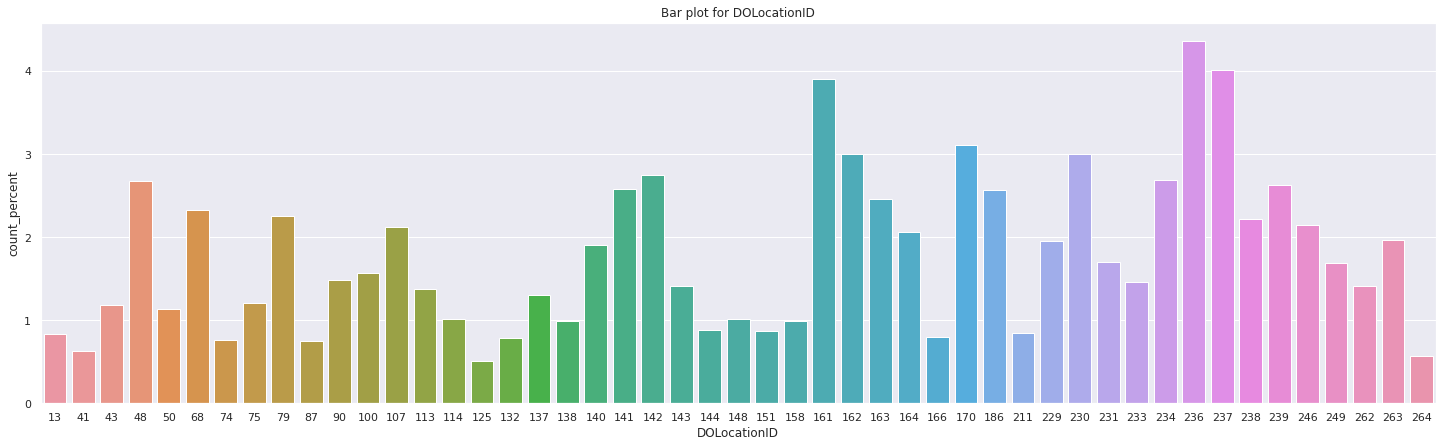

In [47]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights<br>
* The busiest location in terms of pickup are 161, 236 and 237
* The busiest location for dropoff too are 161, 236 and 237.

We can also look for routes which are busiest. 

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [5]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [6]:
# print the first five rows of routes data
trip_data['routes'].head()

0      145-7
1      45-61
2    186-140
3    144-140
4    238-152
Name: routes, dtype: object

Since the above code takes a lot of time to execute we will import already created routes data based on the above code and then merge it with the trip_data dataframe.

In [ ]:
# save routes data to csv to load it later for analysis
trip_data['routes'].to_csv('Data/taxi_data/routes_yellow_tripdata_2018-01.csv',index=False)

KeyError: ignored

In [7]:
# loading routes_data
file_loc_routes_data = 'Data/taxi_data/routes_yellow_tripdata_2018-01.csv'
routes_data = pd.read_csv(file_loc_routes_data)
# assigning new column 'routes' in trip_data to routes_data
trip_data['routes'] = routes_data

FileNotFoundError: ignored

In [ ]:
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes,routes
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,41,24,Cash,4.5,0.00,0.0,5.80,3.300000,0,0,Monday,1.3,41-24
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,239,140,Cash,14.0,0.00,0.0,15.30,18.166667,0,1,Monday,1.3,239-140
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,262,141,Credit_card,6.0,1.00,0.0,8.30,5.916667,0,0,Monday,1.3,262-141
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,140,257,Cash,33.5,0.00,0.0,34.80,32.483333,0,0,Monday,1.3,140-257
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,246,239,Credit_card,12.5,2.75,0.0,16.55,17.800000,0,0,Monday,1.3,246-239


Now let's explore routes through the same bar plot code that we used for Location ID's. But in this case we will only look for routes with more than 0.25% counts (21889 trips).

Number of categories in feature routes above 0.25 % count is 14


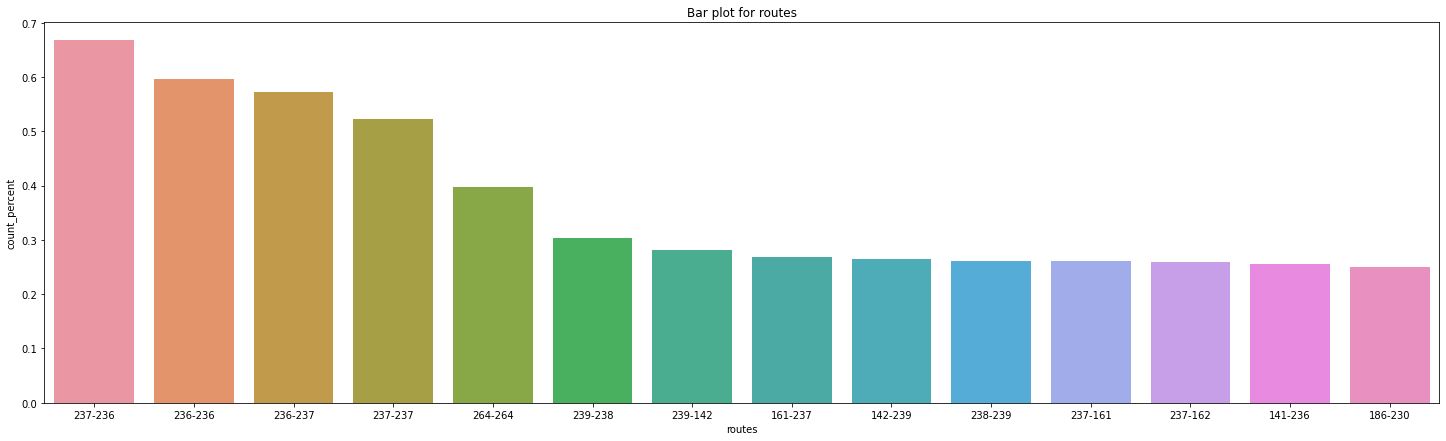

In [8]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:<br>
237-236<br>
236-236<br>
236-237<br>
237-237<br>
264-264<br>



Finally we will look into the distribution of passenger_count

In [9]:
# look into value_counts of 'passenger_count'
trip_data['passenger_count'].value_counts()

1.0    4495265
2.0     926662
3.0     241620
5.0     219000
6.0     128698
0.0     123583
4.0     115640
7.0         26
8.0         18
9.0          8
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

This is the result of some of the most important insights after doing univariate analysis:<br>
* fare_amount  - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 6052 dollars.


* tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 549 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.


* total_amount - most of the total_amount values is within 11 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 10.76 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3147.6 minutes.


* trip_distance - most of the trip_distance is within 1.6 miles value as is shown by the median. The outlier in this case is 369.9.

* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6 to 18. The busiest time is 6PM.
    * there is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Weekdays except Monday have heavy taxi uses.
    * Among weekends Staturday has taxi highest taxi uses as compare to all days.

* From the above plot we can observe that 5 busiest route are following:<br>
237-236<br>
236-236<br>
236-237<br>
237-237<br>
264-264<br>

## **Bivariate Analysis**

Remember that we made some analysis points regarding exploration of duration and pricing:<br>

For pricing we will be exploring it's relationship with:<br>
* hour/day of trip 
* pickup location of trip

For duration we will be exploring it's relationship with:<br>
* hour of day 
* pickup location of trip


**PRICING EXPLORATION**

We have following variables in the dataset that is associated with pricing:<br>
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* total_amount

In our anlaysis for now we will be focussing on:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount

we are leaving tolls_amount for now from our analysis as it contributes very little to the total_amount value because it's median value was 0 i.e. most of the trips are not paying tolls_amount.


*** PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP ***<br>
All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

Let's do a box plot of fair_amount with hour/day of trip to see how the fare changes for different hours of the day and for different days of the week

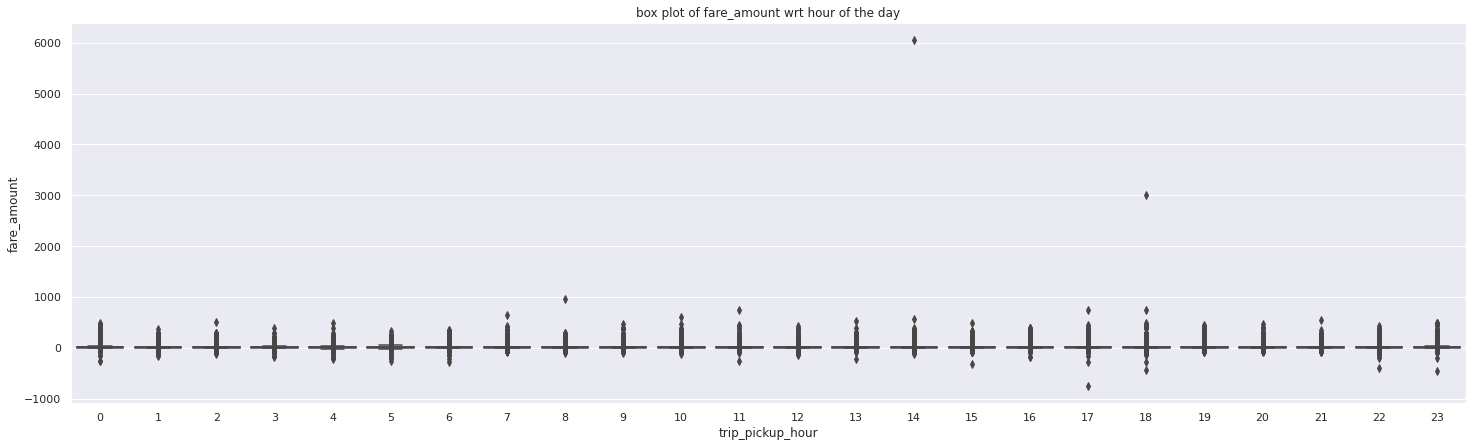

In [10]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

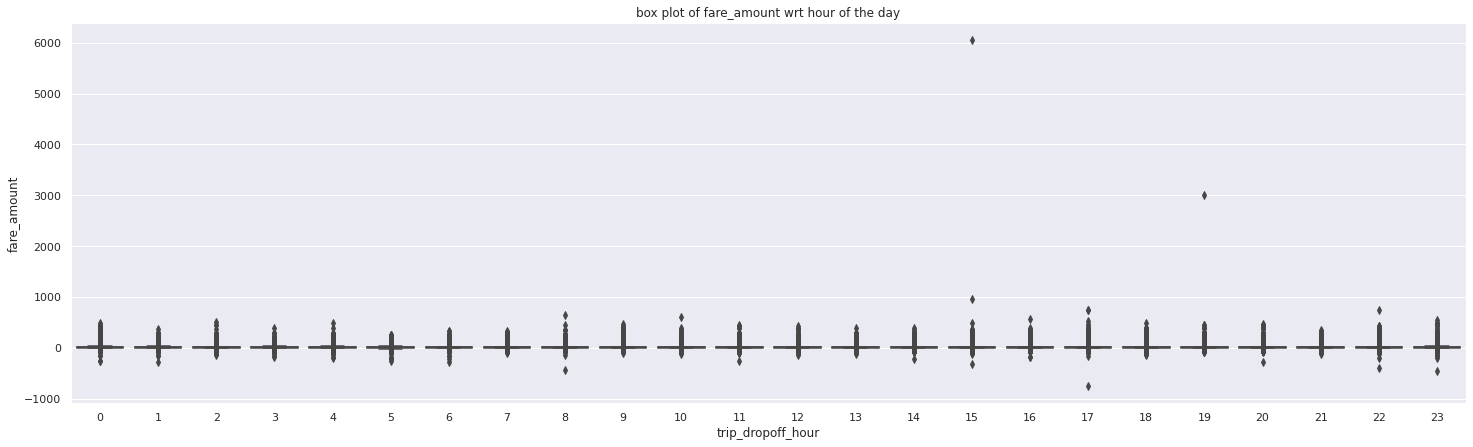

In [11]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare happens during 15 or 3PM to 19 or 7PM based on pickup time.

Based on dropoff time, we have heavy outliers in the morning as well as evening.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars. 

In [12]:
trip_data = trip_data.loc[trip_data['fare']]

KeyError: ignored

In [13]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(6031452, 18)

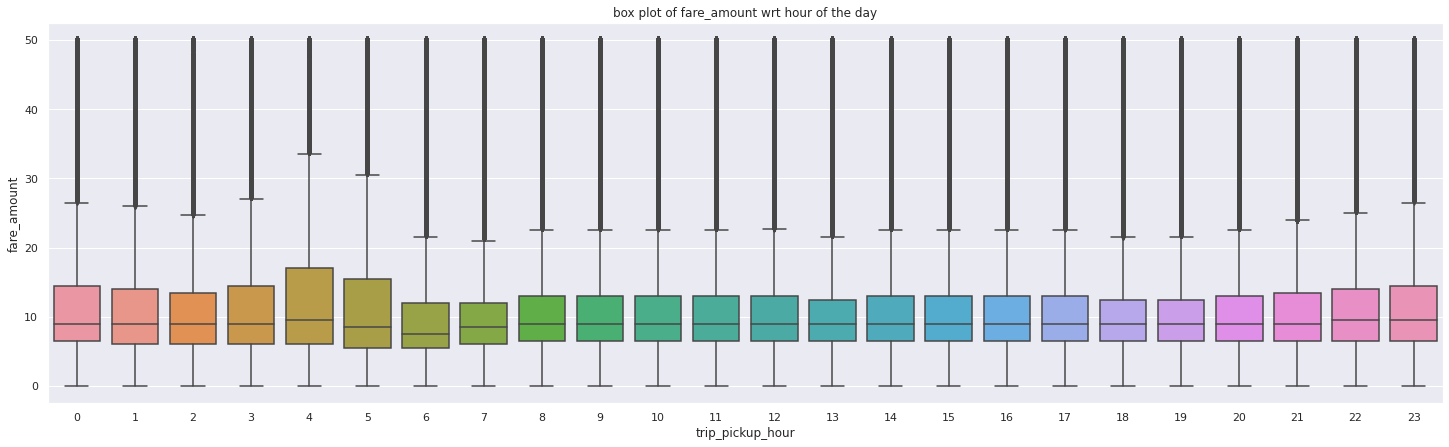

In [14]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

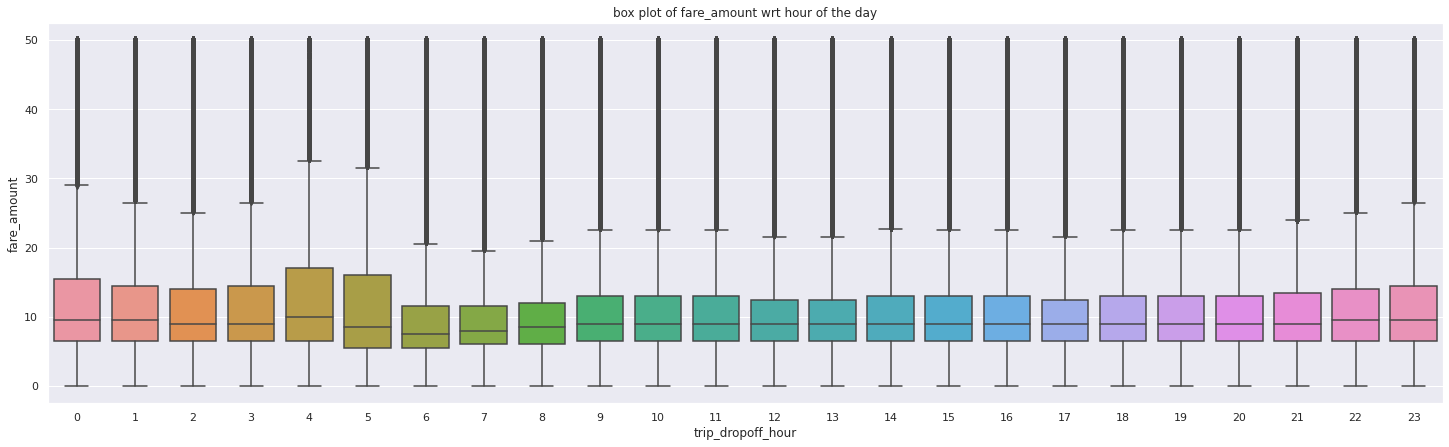

In [15]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can see from the plots that trip pickup and dropoff hours do not have much affect on median fare_amount as median is almost same for all the hours.

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

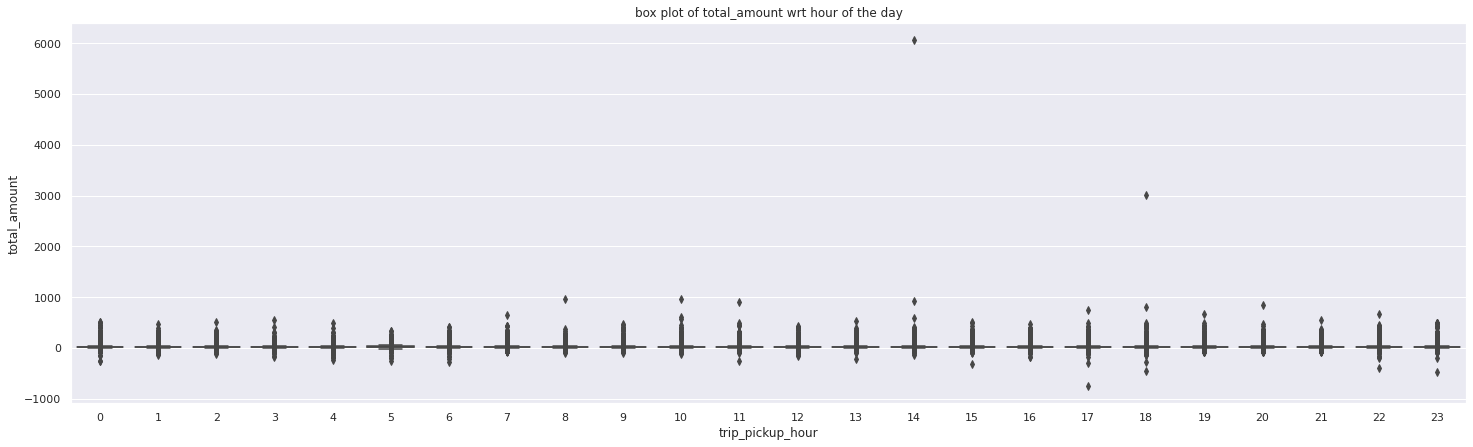

In [16]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

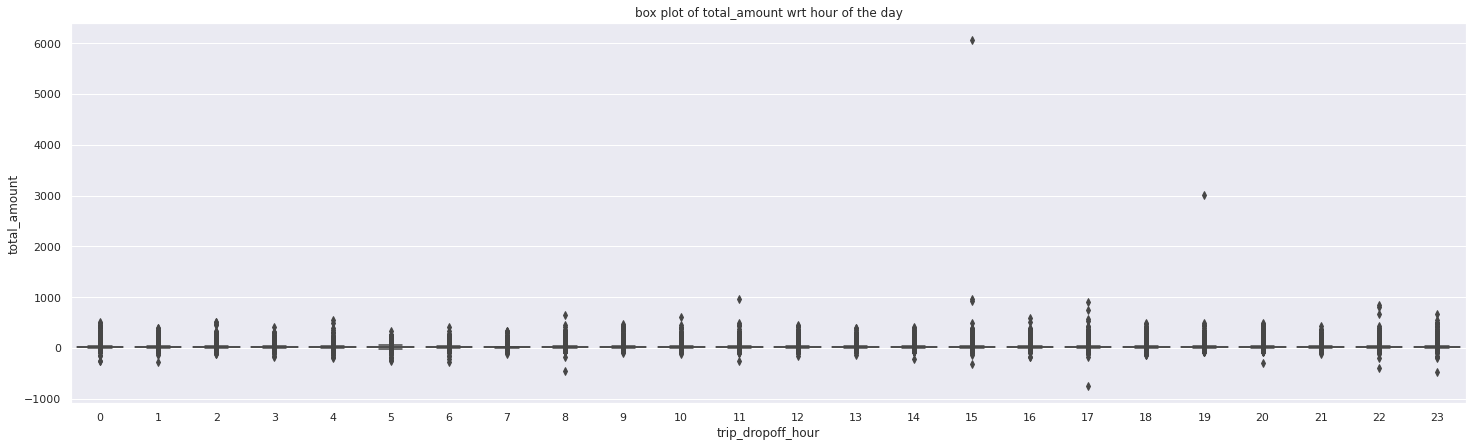

In [17]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again here since we are plotting full range of total_amount our graph is able to show heavy outliers prominently but not the distribution of general cases.

So we will again build a dataframe for total_amount with restricted values less than 50 dollars

In [18]:
# restricted_total_amount_data for filtering total_amount data to less than 50 dollars
restricted_total_amount_data = trip_data.loc[trip_data['total_amount']<=50]
restricted_total_amount_data.shape

(5973550, 18)

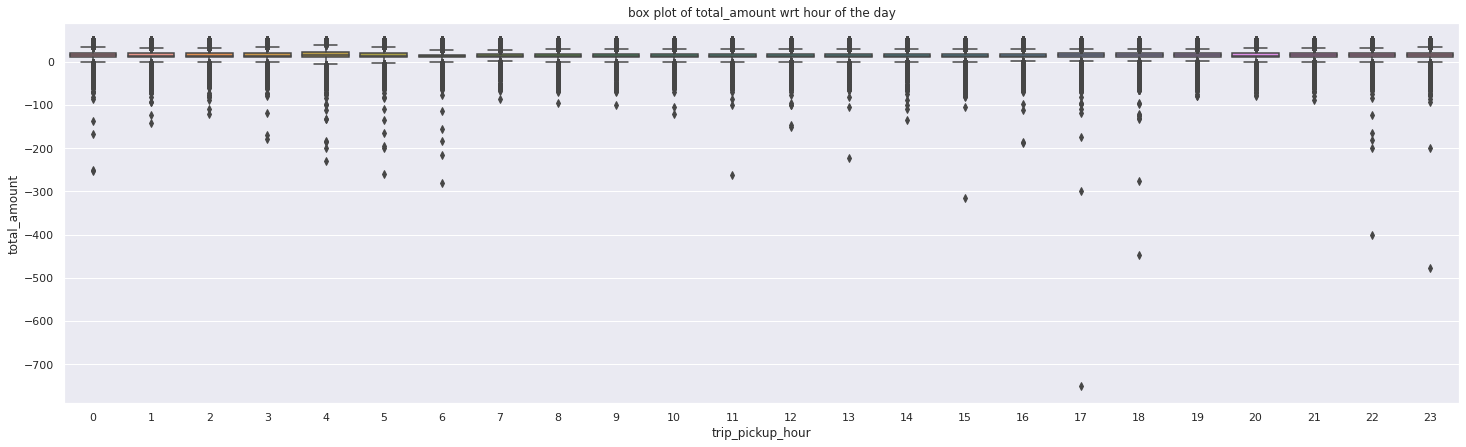

In [19]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

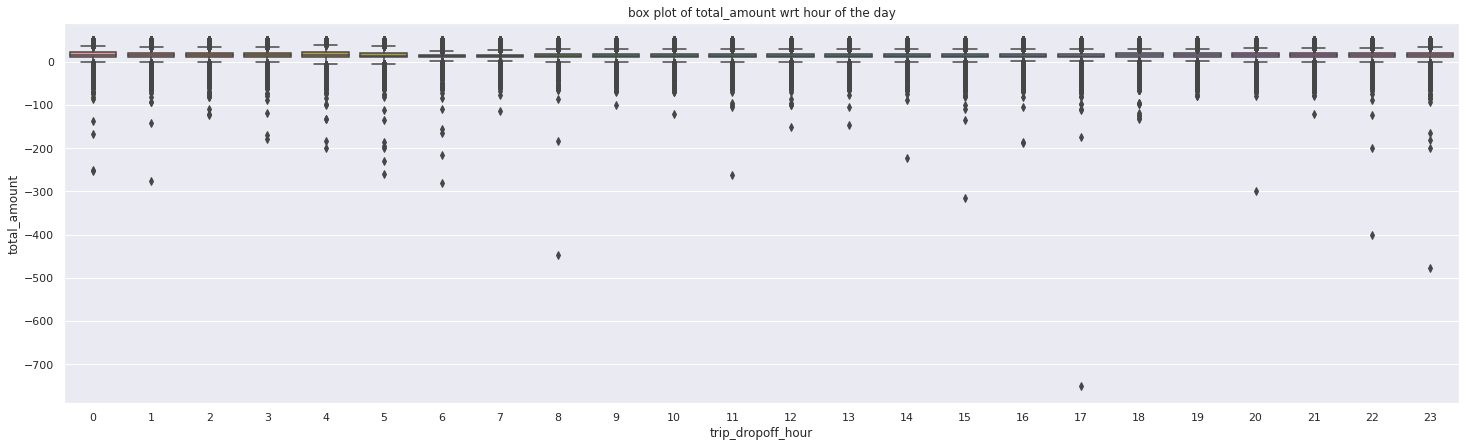

In [20]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again we can see the median value does not changes much for each hour though there is variability in price across the hours indicated by different sizes of boxes for different hours.

We will explore tip_amount and total_taxes now. But for exploring them we will retrict the values for these variables to below 10 dollars because the median value for tip_amount was around 1-2 dollars while for total_taxes was around 0.8 dollars so if to see the general distribution clearly we are restricting it to a range of 5 times the median value.

In [21]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_taxes']<10]

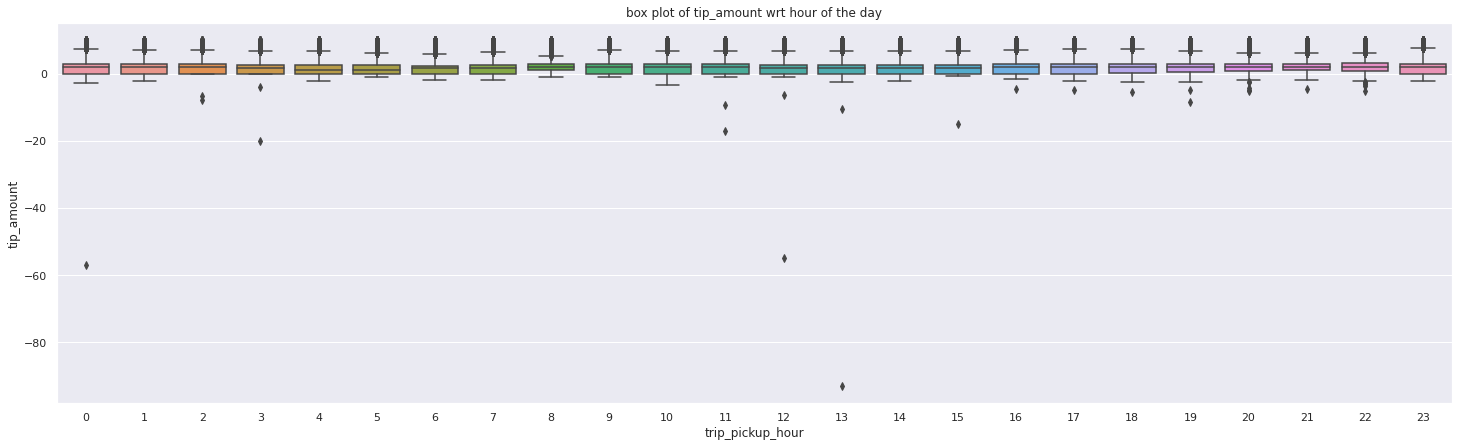

In [22]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

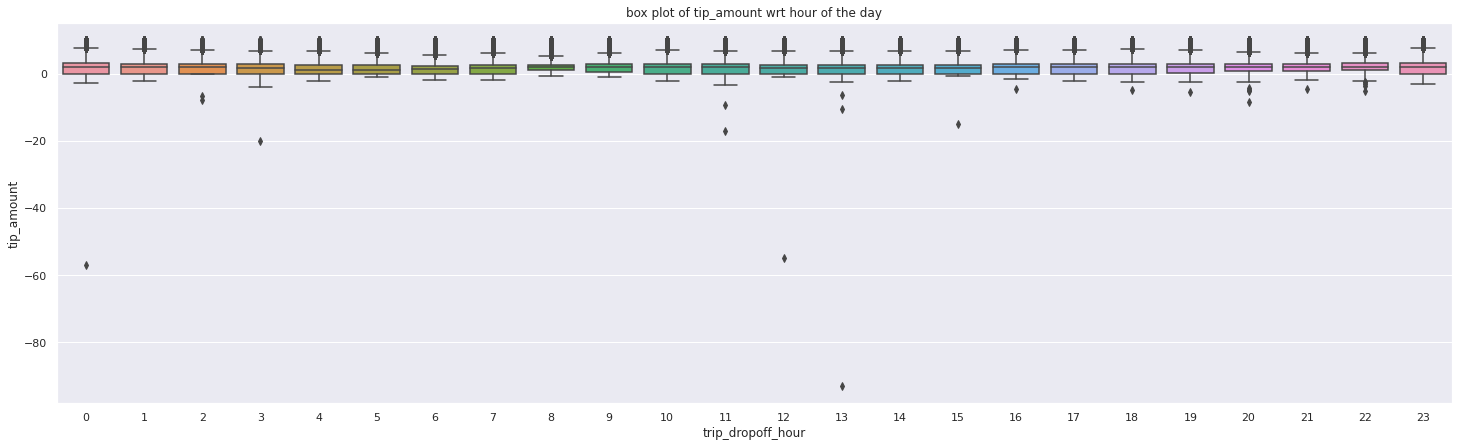

In [23]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

Based on tip_amount plot we can see that tip_amount too does not vary much based on hours.

Let's observe total_taxes now

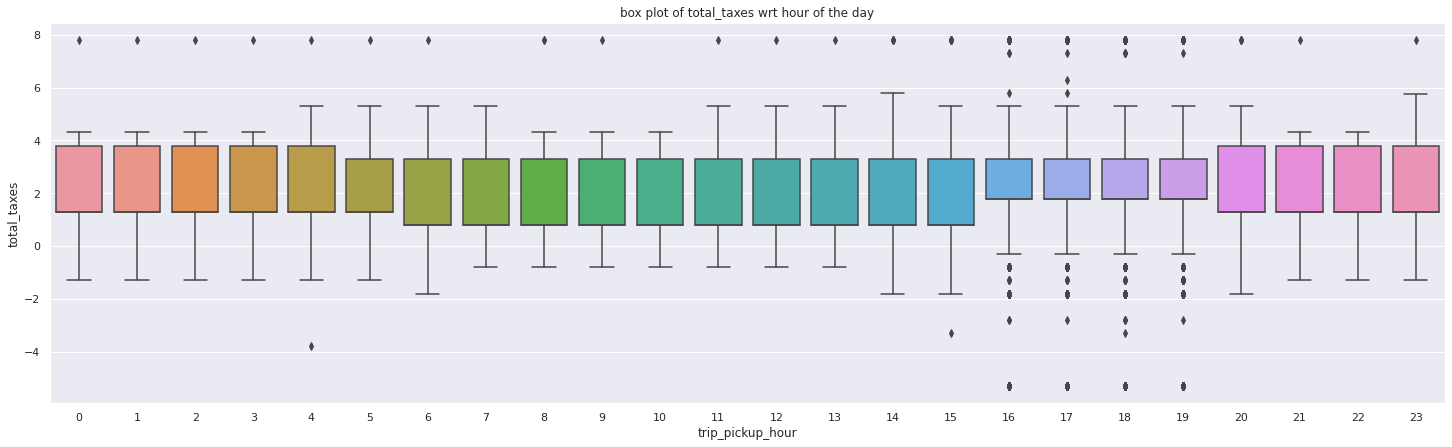

In [24]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

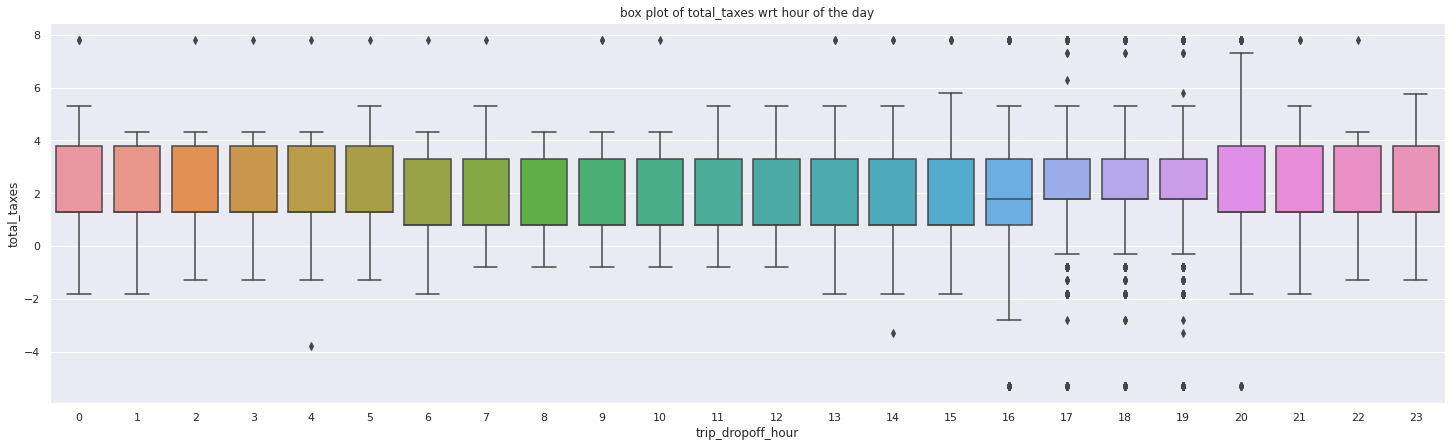

In [25]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

Now in this plot we can clearly observe that total_taxes change significantly with hour of the day. There are two patterns that we can observe here:<br>
* from the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.
* Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

Overall the effect of hour of day is most clearly visible on total_taxes. we have two insights about how taxes change with hours
* Overnight charges are applied between 8PM to 5AM
* Evening has higher variability in taxes and the taxes are usually high.

Let's move and explore the distribution of pricing variables with respect to day of week. For this analysis we will be using restricited version of dataset that we built for fare_amount, total_amount, tip_amount and total_taxes.

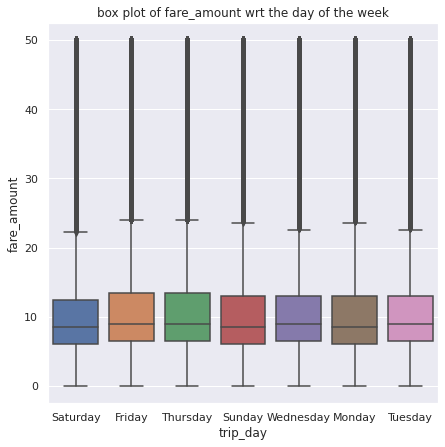

In [26]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

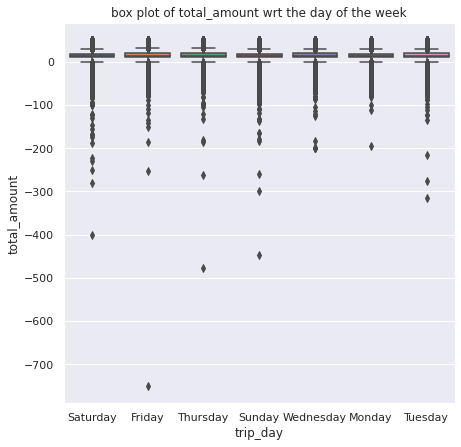

In [27]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week')
sns.set()
plt.show()

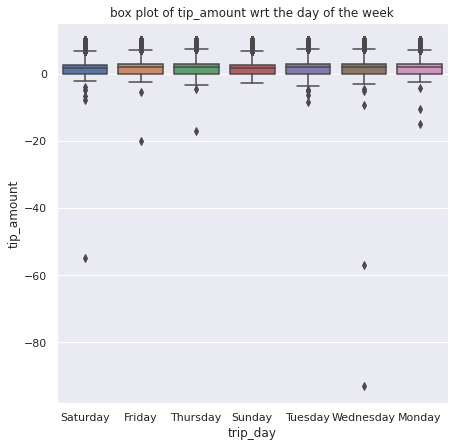

In [28]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

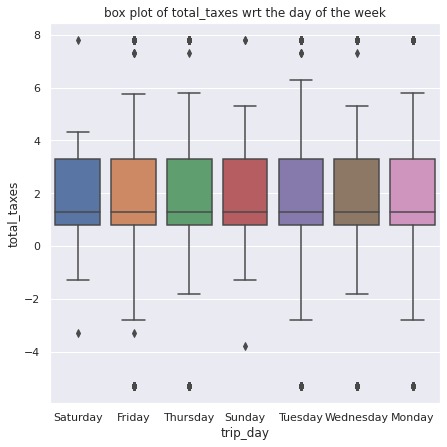

In [29]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.

*** PRICING VARIABLE EXPLORATION WITH LOCATION OF TRIP ***<br>

Here we will look into the price changes for the most frequent trip pickup locations.

In [31]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

161    276881
237    275822
236    258202
162    232125
230    225781
Name: PULocationID, dtype: int64

In [32]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([161, 237, 236, 162, 230, 186, 234, 170, 48, 132], dtype='int64')

The median fare_amount of trips taken from 161 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


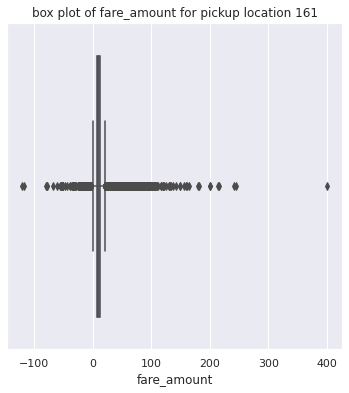

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


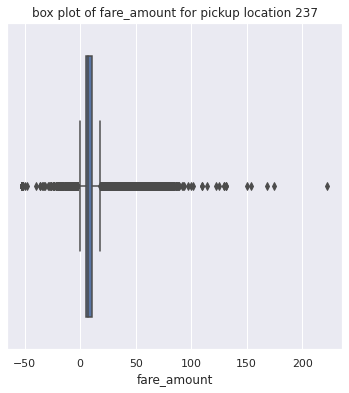

The median fare_amount of trips taken from 236 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


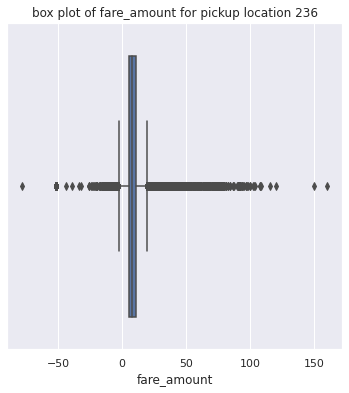

The median fare_amount of trips taken from 162 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


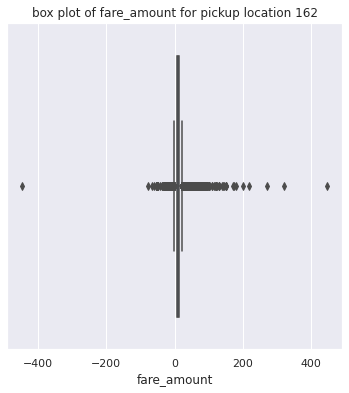

The median fare_amount of trips taken from 230 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


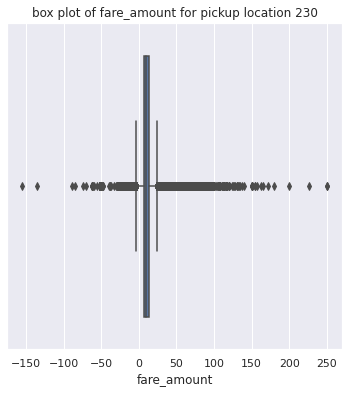

The median fare_amount of trips taken from 186 is 10.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


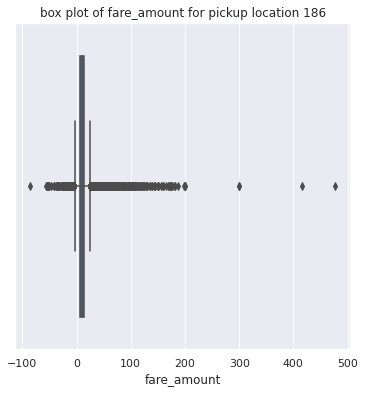

The median fare_amount of trips taken from 234 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


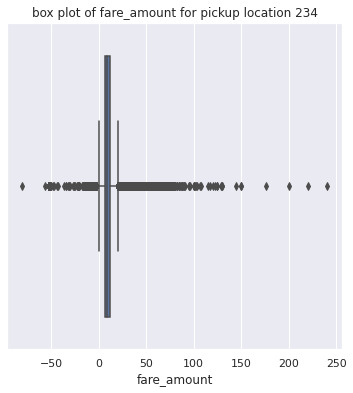

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


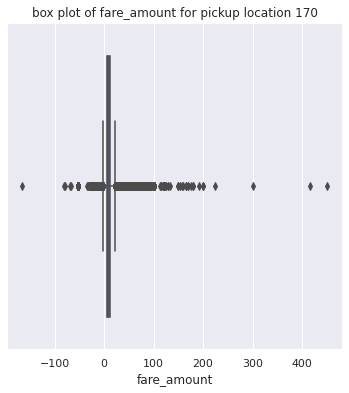

The median fare_amount of trips taken from 48 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


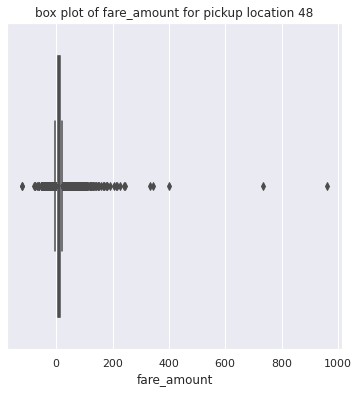

The median fare_amount of trips taken from 132 is 52.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


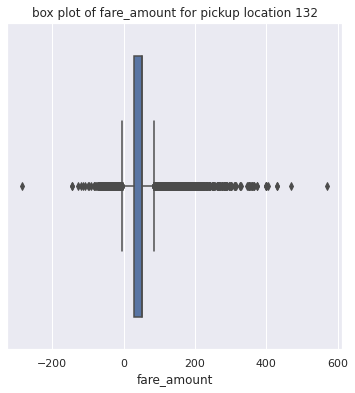

In [33]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location median fare_amount is quite low in comparison to other busy locations. Though the outliers for pickup location 237 is high.

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

**DURATION EXPLORATION**

Here we will explore the duration of trip exploration with pickup hour of day.

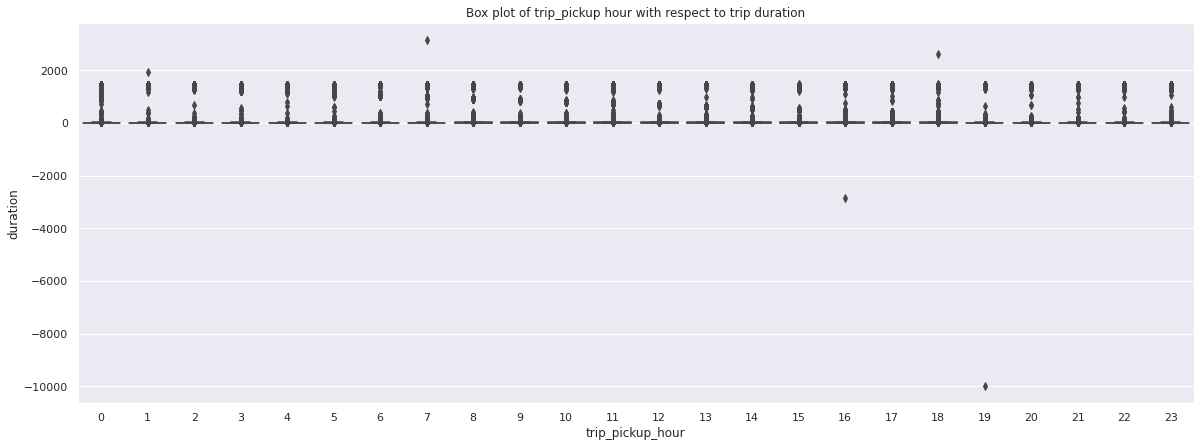

In [34]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Here again due to heavy outliers in duration data we are not able to observe the general graph. we might need to restrict our duration values to within 50min. 

In [35]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(6168316, 18)

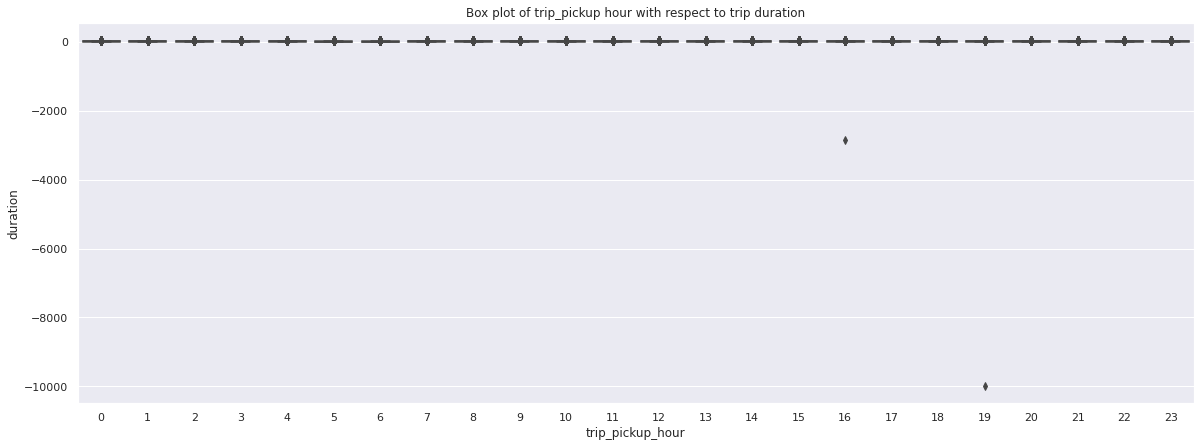

In [36]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Early morning hours of 5AM to 6AM have shorter duration trips

Let's also explore duration with respect to top pickup location.

The median trip duration of trips taken from 161 is 11.583333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


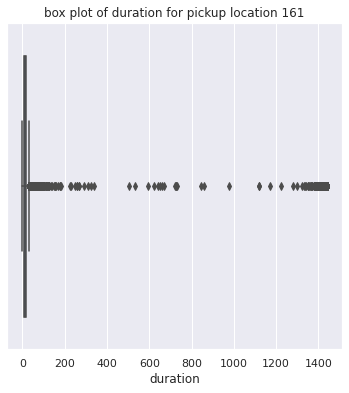

The median trip duration of trips taken from 237 is 8.433333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


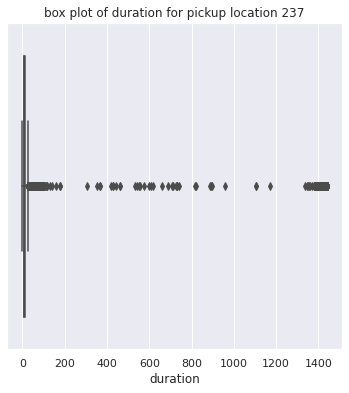

The median trip duration of trips taken from 236 is 8.566666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


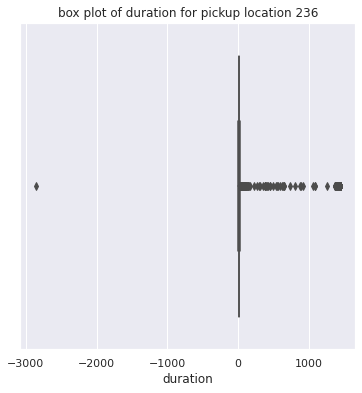

The median trip duration of trips taken from 162 is 11.166666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


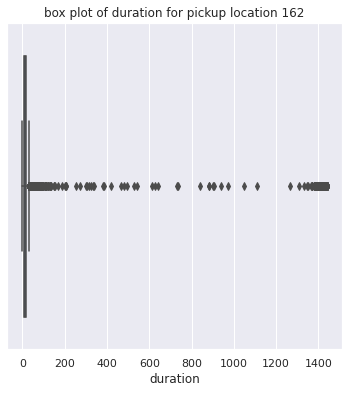

The median trip duration of trips taken from 230 is 11.15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


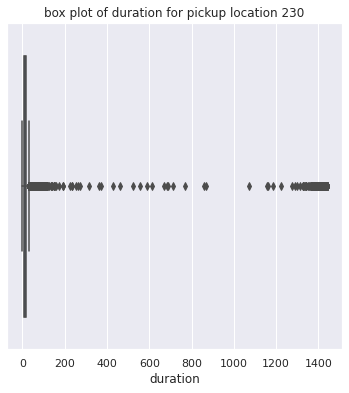

The median trip duration of trips taken from 186 is 13.116666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


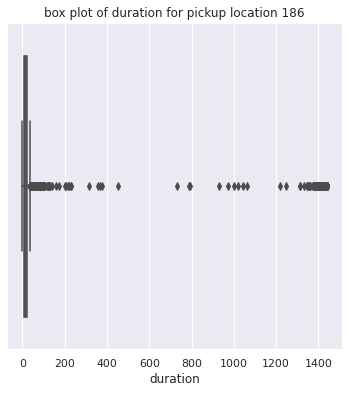

The median trip duration of trips taken from 234 is 10.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


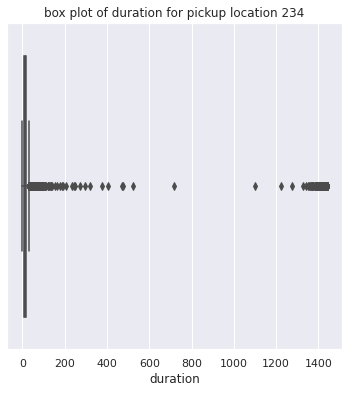

The median trip duration of trips taken from 170 is 10.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


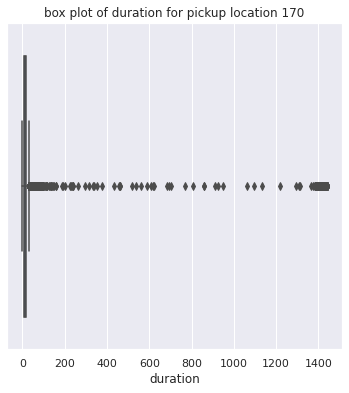

The median trip duration of trips taken from 48 is 9.683333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


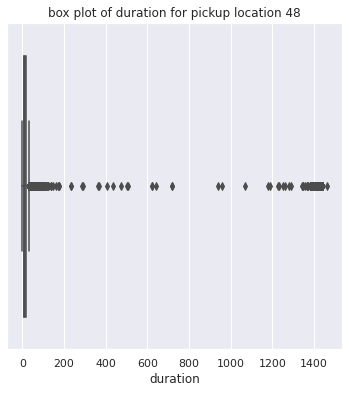

The median trip duration of trips taken from 132 is 32.81666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


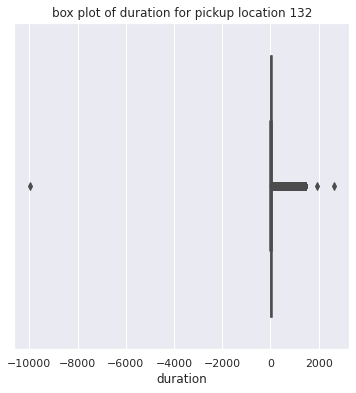

In [37]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

Here again we can see for the most frequent pickup location 237 the duration value is less in comparison to other pickup locations, though 236 as well has lower duration amount close to 8 min. this might be the reason for less fare_amount as well.

## FINAL RESULTS FROM EDA

Following insights would be useful for our company's product launch in New York
* fare_amount  - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 6052 dollars.


* tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 549 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.


* total_amount - most of the total_amount values is within 11 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 10.76 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3147.6 minutes.


* trip_distance - most of the trip_distance is within 1.6 miles value as is shown by the median. The outlier in this case is 369.9.

* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6 to 18. The busiest time is 6PM.
    * there is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Weekdays except Monday have heavy taxi uses.
    * Among weekends Staturday has taxi highest taxi uses as compare to all days.

* From the above plot we can observe that 5 busiest route are following:<br>
237-236<br>
236-236<br>
236-237<br>
237-237<br>
264-264<br>


* From the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.


* Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.


* We discovered from the dataset that even for the busiest pickup location the median fare_amount is a bit lower than other busier pickup locations. So just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.


* Early morning hours of 5AM to 6AM have shorter duration trips


**FURTHER ANALYSIS**<br>
We can look into following for a followup analysis<br>
* We can increase the dataset size i.e. we can take the data for more months rather than just one month's data that we used in this analysis.

* We could analyse routes with fare_amount or total_taxes and duration for different time of the day.

* Prediction of fare_amount or total_taxes based on time and location.

* Prediction of duration based on time and location.

